___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = 'notebook'
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Explore Data

You can rename columns to more usable, if you need.

In [22]:
df.rename(columns= {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
df.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39


In [23]:
X = df.copy()

In [24]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['Male', 'Female']

enc = OrdinalEncoder(categories= [categories])

enc.fit_transform(X[["Gender"]])

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [25]:
new = pd.DataFrame( enc.fit_transform(X[["Gender"]]) )

In [26]:
X['Gender'] = new
X

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,0.00,19,15,39
1,2,0.00,21,15,81
2,3,1.00,20,16,6
3,4,1.00,23,16,77
4,5,1.00,31,17,40
...,...,...,...,...,...
195,196,1.00,35,120,79
196,197,1.00,45,126,28
197,198,0.00,32,126,74
198,199,0.00,32,137,18


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    float64
 2   Age             200 non-null    int64  
 3   Annual_Income   200 non-null    int64  
 4   Spending_Score  200 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





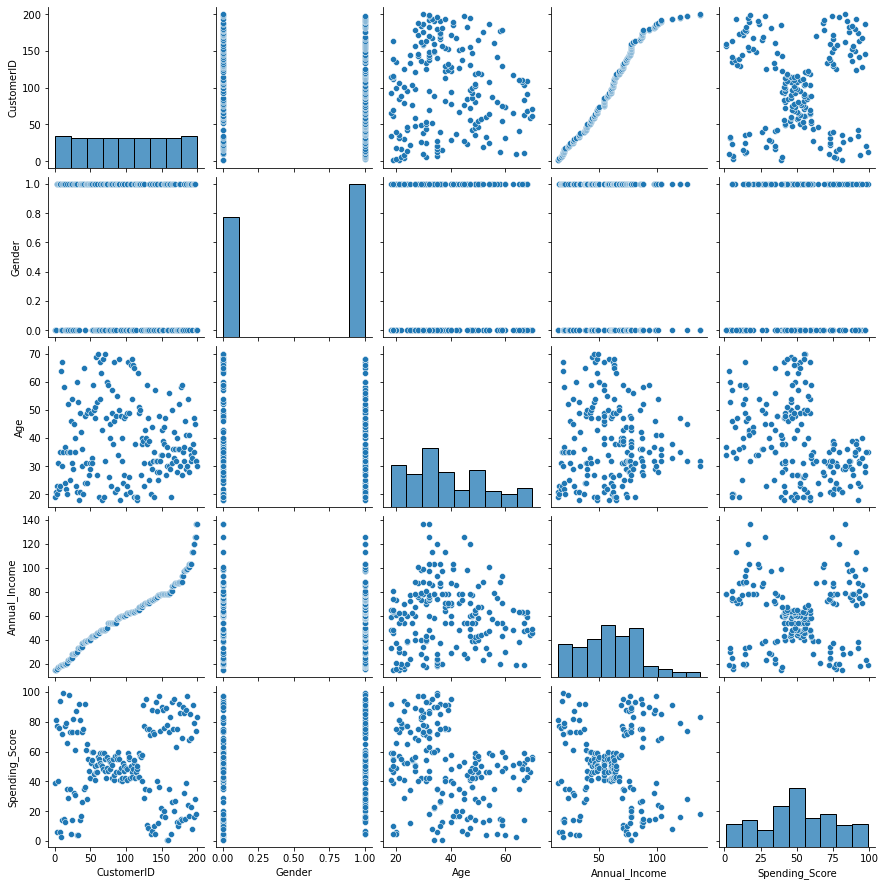

In [28]:
sns.pairplot(X)
plt.show();

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_1= pd.DataFrame(X_scaled, columns =X.columns)
X_1

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,0.00,0.00,0.02,0.00,0.39
1,0.01,0.00,0.06,0.00,0.82
2,0.01,1.00,0.04,0.01,0.05
3,0.02,1.00,0.10,0.01,0.78
4,0.02,1.00,0.25,0.02,0.40
...,...,...,...,...,...
195,0.98,1.00,0.33,0.86,0.80
196,0.98,1.00,0.52,0.91,0.28
197,0.99,0.00,0.27,0.91,0.74
198,0.99,0.00,0.27,1.00,0.17


In [32]:
X_1.drop(columns=['CustomerID'], inplace=True)

In [33]:
X_1

,Gender,Age,Annual_Income,Spending_Score
0,0.00,0.02,0.00,0.39
1,0.00,0.06,0.00,0.82
2,1.00,0.04,0.01,0.05
3,1.00,0.10,0.01,0.78
4,1.00,0.25,0.02,0.40
...,...,...,...,...
195,1.00,0.33,0.86,0.80
196,1.00,0.52,0.91,0.28
197,0.00,0.27,0.91,0.74
198,0.00,0.27,1.00,0.17


# Hopkins Test

In [34]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [35]:
hopkins(X_1, X_1.shape[0])


0.1999676031026665

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [36]:
X_2 = X_1.loc[:, ['Age', 'Spending_Score']]

In [37]:
X_2

,Age,Spending_Score
0,0.02,0.39
1,0.06,0.82
2,0.04,0.05
3,0.10,0.78
4,0.25,0.40
...,...,...
195,0.33,0.80
196,0.52,0.28
197,0.27,0.74
198,0.27,0.17


In [38]:
#hopkins(X, X.shape[0])

#### *ii. Determine optimal number of clusters*

In [39]:
from sklearn.cluster import KMeans


In [40]:

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

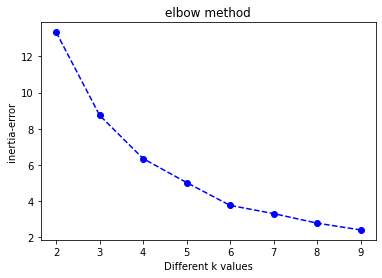

In [41]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [42]:
ssd

[13.337690580804235,
 8.742042168276535,
 6.350246319122475,
 5.026143351352525,
 3.762796809327069,
 3.310446181738137,
 2.7815521203565936,
 2.406636281222873]

In [43]:
-pd.Series(ssd).diff()


0    NaN
1   4.60
2   2.39
3   1.32
4   1.26
5   0.45
6   0.53
7   0.37
dtype: float64

# Yellowbrick


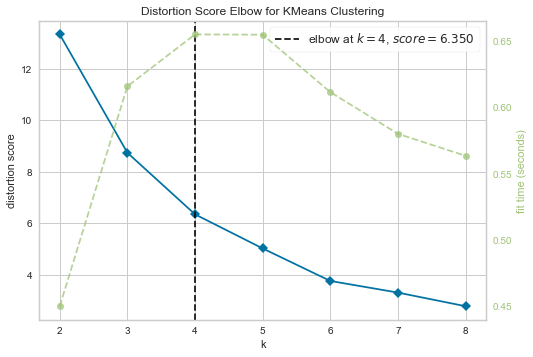

In [44]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_2)        # Fit the data to the visualizer
visualizer.poof();

# Silhouette Analysis


In [45]:
from sklearn.metrics import silhouette_score


In [46]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.42882713071959183
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.45615225386265235
For n_clusters=7, the silhouette score is 0.40578335793980236
For n_clusters=8, the silhouette score is 0.4169908111029726


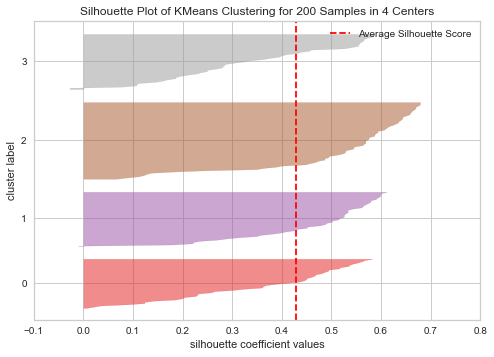

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)          # n_clusters=4'e karar verdik !
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X_2)    # Fit the data to the visualizer
visualizer.poof();

In [48]:
model.labels_

array([2, 8, 4, 8, 2, 8, 7, 8, 3, 6, 3, 0, 3, 8, 7, 8, 7, 8, 3, 0, 7, 8,
       3, 6, 3, 8, 1, 6, 7, 8, 3, 8, 3, 8, 3, 8, 7, 6, 7, 8, 5, 8, 1, 6,
       3, 2, 1, 2, 2, 2, 1, 6, 2, 5, 1, 1, 1, 5, 2, 1, 5, 2, 5, 1, 5, 2,
       1, 5, 2, 2, 5, 1, 5, 5, 5, 2, 1, 1, 2, 1, 5, 6, 5, 1, 2, 1, 1, 2,
       6, 1, 5, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 5, 2, 1, 2, 5, 1, 5, 5,
       5, 2, 1, 2, 2, 2, 5, 1, 1, 1, 2, 1, 1, 0, 4, 6, 1, 0, 3, 6, 3, 6,
       2, 6, 4, 0, 7, 6, 4, 6, 3, 0, 2, 0, 4, 0, 1, 6, 7, 0, 7, 0, 7, 6,
       3, 8, 7, 6, 7, 6, 1, 8, 4, 0, 3, 6, 7, 0, 7, 6, 7, 6, 7, 0, 3, 0,
       3, 6, 3, 0, 7, 0, 3, 0, 1, 0, 3, 6, 7, 0, 7, 6, 7, 0, 3, 6, 7, 6,
       7, 0])

In [49]:
visualizer.silhouette_samples_

array([ 0.55396836,  0.48597476,  0.19888289,  0.49422429,  0.46591728,
        0.44736359,  0.37488959,  0.56224085,  0.18618371,  0.54577265,
       -0.01050146,  0.60569208,  0.24921101,  0.52098122,  0.43712945,
        0.49349507,  0.12288488,  0.06632945,  0.10627999,  0.61249572,
        0.12288488,  0.46781124,  0.56261202,  0.57455432,  0.39368727,
        0.662792  ,  0.28080058,  0.18145585,  0.32290956,  0.56890803,
        0.28640792,  0.34786613,  0.45471238,  0.45632031,  0.52579275,
        0.48597476,  0.58297285,  0.56859213,  0.21093042,  0.36266085,
        0.39799423,  0.58665802, -0.02801392,  0.12135647,  0.27904404,
        0.13607679,  0.52523703,  0.51489748,  0.54340776,  0.49293639,
        0.48924907,  0.11074964,  0.22667842,  0.59846647,  0.42989504,
        0.18098775,  0.52511284,  0.51491645,  0.43545247,  0.51425264,
        0.53237147,  0.3600633 ,  0.57059117,  0.57864134,  0.59920803,
        0.22919039,  0.22103359,  0.54232973,  0.23084159,  0.41

In [50]:
for i in range(model4.n_clusters):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.35429947673405393
mean silhouette score for label 1    : 0.46242685716507614
mean silhouette score for label 2    : 0.5179970803899694
mean silhouette score for label 3    : 0.3392213290669487
mean silhouette score for all labels : 0.42882713071959183


### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [51]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(X_2)

array([0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0, 2, 4, 2, 0,
       4, 2, 0, 0, 2, 4, 2, 2, 2, 0, 4, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0,
       3, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 4, 0, 2, 4, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 3, 4, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [52]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0, 2, 4, 2, 0,
       4, 2, 0, 0, 2, 4, 2, 2, 2, 0, 4, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0,
       3, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 4, 0, 2, 4, 2, 2,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 3, 4, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [53]:
clusters2 = kmeans.labels_

In [54]:
X_comp = df


In [55]:
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [57]:
X_comp['Predicted(Age-Spending_Score)'] = clusters2

In [58]:
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score)
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [64]:
X_2['cluster_Kmeans'] = kmeans.fit_predict(X_2) #kmeans2.labels_
X_2

,Age,Spending_Score,cluster_Kmeans
0,0.02,0.39,0
1,0.06,0.82,3
2,0.04,0.05,0
3,0.10,0.78,3
4,0.25,0.40,0
...,...,...,...
195,0.33,0.80,3
196,0.52,0.28,1
197,0.27,0.74,3
198,0.27,0.17,1


#### *iv. Visualizing and Labeling All the Clusters*

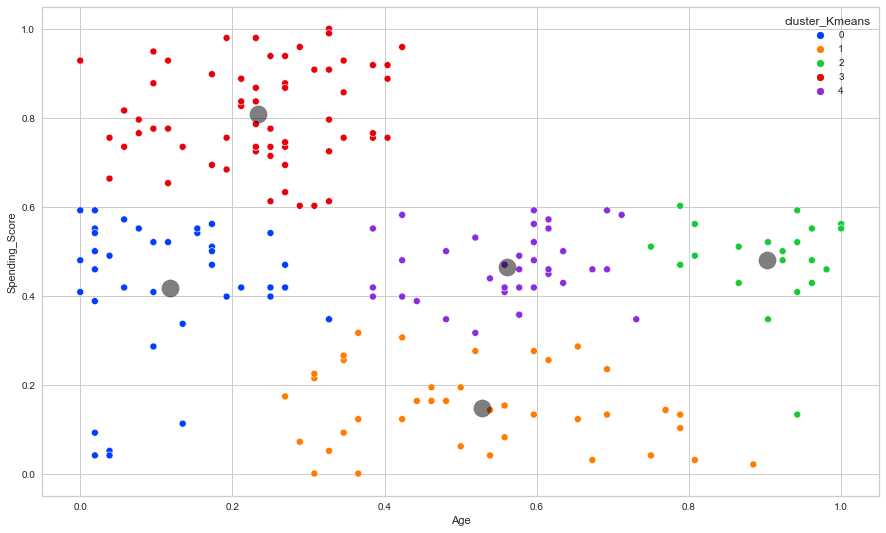

In [66]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=X_2, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [67]:
from scipy.cluster.hierarchy import linkage


In [68]:
X_3 = X_1.loc[:, ['Annual_Income', 'Spending_Score']]

In [69]:
X_3

,Annual_Income,Spending_Score
0,0.00,0.39
1,0.00,0.82
2,0.01,0.05
3,0.01,0.78
4,0.02,0.40
...,...,...
195,0.86,0.80
196,0.91,0.28
197,0.91,0.74
198,1.00,0.17


In [70]:
hopkins(X_3, X_3.shape[0])

0.3029741906899561

In [71]:
from scipy.cluster.hierarchy import dendrogram


#### *ii. Determine optimal number of clusters*

# Elbow Method

In [72]:
from sklearn.cluster import KMeans


ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_3)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

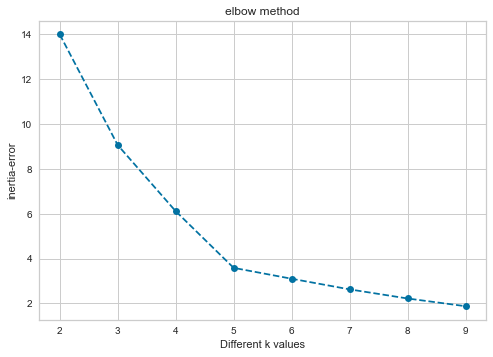

In [73]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [74]:
ssd

[13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.0983851418825865,
 2.624103948396721,
 2.2180573120830718,
 1.873434667867071]

In [75]:
-pd.Series(ssd).diff()

0    NaN
1   4.93
2   2.95
3   2.53
4   0.48
5   0.47
6   0.41
7   0.34
dtype: float64

## Yellowbrick

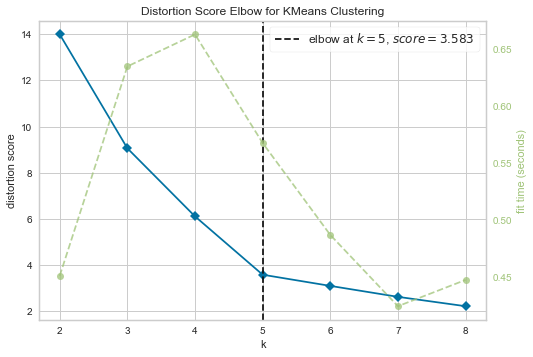

In [76]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_3)       
visualizer.poof();

## Silhouette Analysis

In [77]:
from sklearn.metrics import silhouette_score

In [78]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.5377658512956012
For n_clusters=7, the silhouette score is 0.5187916611768829
For n_clusters=8, the silhouette score is 0.43038461857643606
For n_clusters=9, the silhouette score is 0.4435209006412269


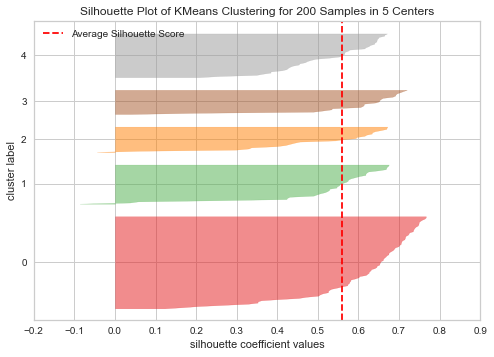

In [79]:
from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)          # n_clusters=3'e karar verdik !
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_3)    # Fit the data to the visualizer
visualizer.poof();

In [80]:
model5.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [81]:
visualizer.silhouette_samples_

array([ 0.33580108,  0.69473511,  0.63293448,  0.69123745,  0.2984495 ,
        0.69012557,  0.64026293,  0.6506099 ,  0.61925785,  0.64198051,
        0.66840951,  0.61039547,  0.66931342,  0.71048714,  0.67094677,
        0.71898933,  0.41979519,  0.4883633 ,  0.54272109,  0.61300382,
        0.39751963,  0.65956848,  0.63280583,  0.65459908,  0.65535602,
        0.70325269,  0.44169021,  0.19342169,  0.45505638,  0.68369556,
        0.59543314,  0.60403987,  0.5602012 ,  0.61353253,  0.61456446,
        0.65119975,  0.59288044,  0.53509558,  0.43065719,  0.51180251,
        0.05947421,  0.53277759, -0.04466494,  0.16772625,  0.32926751,
        0.03761109,  0.45215253,  0.50055572,  0.35136978,  0.35136978,
        0.57222956,  0.32844447,  0.55821474,  0.36011199,  0.53298812,
        0.40320704,  0.63977123,  0.57987703,  0.66886229,  0.62150424,
        0.57742035,  0.60215641,  0.67373044,  0.50442533,  0.70008932,
        0.52474556,  0.70700731,  0.68768234,  0.52474556,  0.67

In [82]:
for i in range(4):
    print(f"mean silhoutte score for label {i:<4} : {visualizer.silhouette_samples_[model5.labels_ == i].mean()}")
print(f"mean silhoutte score for all labels : {silhouette_score(X_3, model5.labels_)}")

mean silhoutte score for label 0    : 0.6119010983052857
mean silhoutte score for label 1    : 0.5100676264333632
mean silhoutte score for label 2    : 0.4877449175242944
mean silhoutte score for label 3    : 0.585932908834499
mean silhoutte score for all labels : 0.5594854531227246


#### *iii. Apply K Means*

In [83]:
kmeans3 = KMeans(n_clusters = 5, random_state=42) #for 5 clusters
kmeans3.fit_predict(X_3)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [84]:
kmeans3.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [85]:
clusters3 = kmeans3.labels_

In [86]:
X_comp['Predicted(Annual_Income-Spending_Score)'] = clusters3
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score)
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,3,4
198,199,Male,32,137,18,1,1


In [87]:
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score)
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,3,4
198,199,Male,32,137,18,1,1


#### *iv. Visualizing and Labeling All the Clusters*

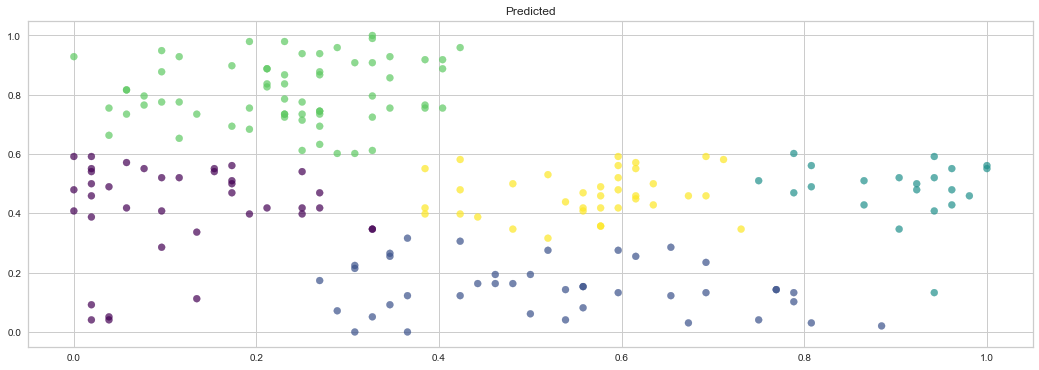

In [90]:
plt.figure(figsize = (18,6))

plt.scatter(X_2["Age"], X_2["Spending_Score"], c = clusters2, cmap = "viridis", alpha=0.7)
plt.title("Predicted")  
plt.show();

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [91]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, linkage

In [92]:
hc_ward = linkage(y = X_2, method = "ward")
hc_complete = linkage(X_2, "complete")
hc_average = linkage(X_2, "average")
hc_single = linkage(X_2, "single")

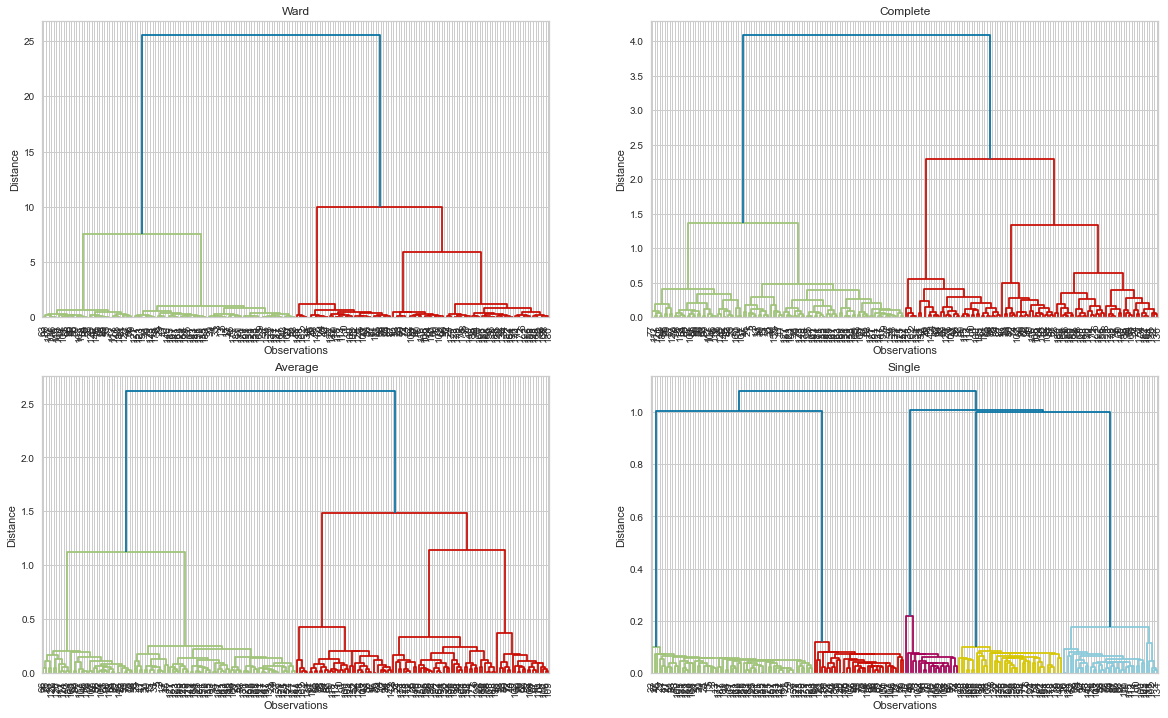

In [93]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

In [94]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_3)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.39090074716611595
For n_clusters=3, the silhouette score is 0.44796167261691394
For n_clusters=4, the silhouette score is 0.4976418539903167
For n_clusters=5, the silhouette score is 0.5582698727196419
For n_clusters=6, the silhouette score is 0.5296670434232814
For n_clusters=7, the silhouette score is 0.409308025869031
For n_clusters=8, the silhouette score is 0.41055127971395405
For n_clusters=9, the silhouette score is 0.4177210331066167


In [96]:
model3_hc = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")

In [97]:
model3_hc.fit_predict(X_3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [98]:
model3_hc.labels_


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [99]:
clusters3 = model3_hc.labels_

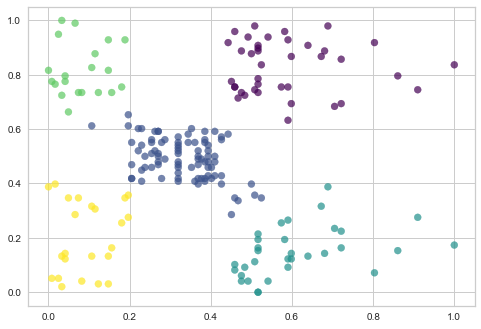

In [101]:
plt.scatter(X_3["Annual_Income"], X_3["Spending_Score"], c = model3_hc.labels_, cmap = "viridis", alpha =0.7);

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

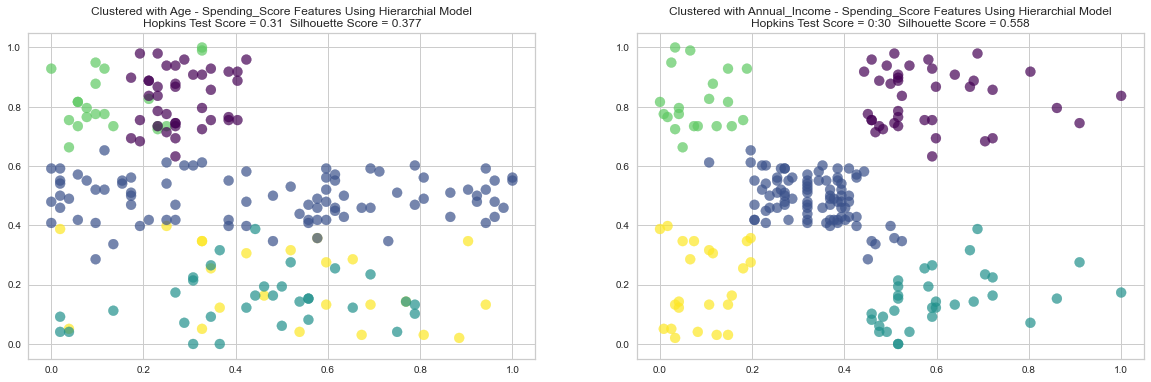

In [102]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X_2["Age"], X_2["Spending_Score"], c = clusters3, cmap = "viridis", alpha=0.7, s=100)
plt.title("Clustered with Age - Spending_Score Features Using Hierarchial Model\nHopkins Test Score = 0.31  Silhouette Score = 0.377")

plt.subplot(122)
plt.scatter(X_3["Annual_Income"], X_3["Spending_Score"], c = clusters3, cmap = "viridis", alpha=0.7, s=100)
plt.title("Clustered with Annual_Income - Spending_Score Features Using Hierarchial Model\nHopkins Test Score = 0:30  Silhouette Score = 0.558");

In [104]:
X_comp['Pred(A_I-S_S-Hierarchical)']=clusters3
X_comp

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score),Pred(A_I-S_S-Hierarchical)
0,1,Male,19,15,39,0,2,4
1,2,Male,21,15,81,3,3,3
2,3,Female,20,16,6,0,2,4
3,4,Female,23,16,77,3,3,3
4,5,Female,31,17,40,0,2,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4,0
196,197,Female,45,126,28,1,1,2
197,198,Male,32,126,74,3,4,0
198,199,Male,32,137,18,1,1,2


## Age and Spending Score- X1

In [114]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X_2)

In [115]:
X_2['cluster_Agg'] = y_agg
X_2.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,0.02,0.39,0,2
1,0.06,0.82,3,1
2,0.04,0.05,0,2
3,0.10,0.78,3,1
4,0.25,0.40,0,2


#### iii. Visualizing and Labeling All the Clusters

## Age and Spending Score- X1

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

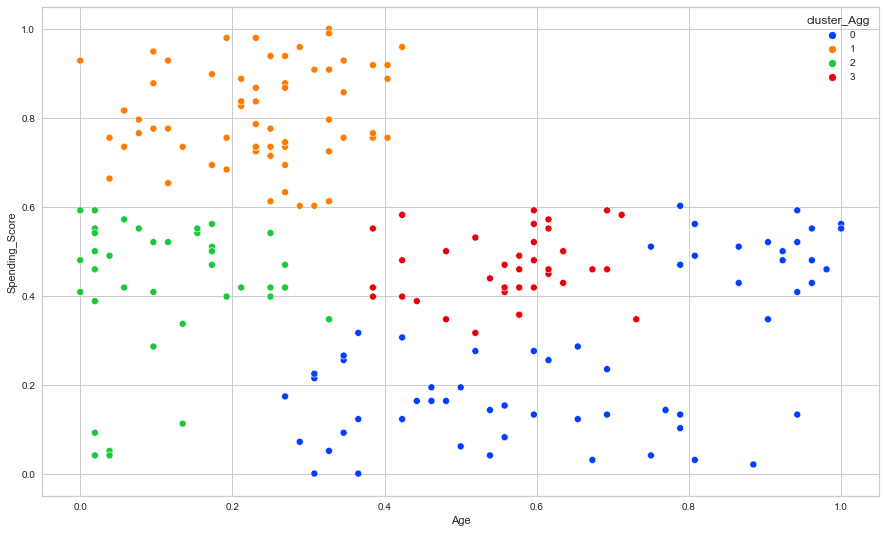

In [116]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X_2, palette="bright")


## Annual Income and Spending Score- X2


In [131]:
plt.figure(figsize = (20,10))
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=X_2, palette="bright")


ValueError: Could not interpret value `Annual_Income` for parameter `x`

<Figure size 1440x720 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

## Interpretation based on Age and Spending Score- x1

In [120]:
X_2.head()


,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,0.02,0.39,0,2
1,0.06,0.82,3,1
2,0.04,0.05,0,2
3,0.10,0.78,3,1
4,0.25,0.40,0,2


In [122]:
X_2.cluster_Kmeans.value_counts()


3    64
1    41
0    38
4    36
2    21
Name: cluster_Kmeans, dtype: int64

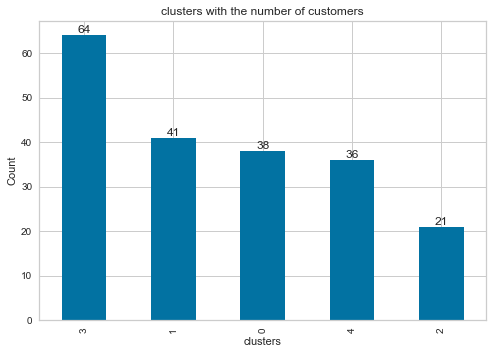

In [123]:
 #lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X_2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [124]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score),Pred(A_I-S_S-Hierarchical)
0,1,Male,19,15,39,0,2,4
1,2,Male,21,15,81,3,3,3
2,3,Female,20,16,6,0,2,4
3,4,Female,23,16,77,3,3,3
4,5,Female,31,17,40,0,2,4


In [125]:
df["cluster_Age_Spending_Score"] = X_2.cluster_Kmeans
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score),Pred(A_I-S_S-Hierarchical),cluster_Age_Spending_Score
0,1,Male,19,15,39,0,2,4,0
1,2,Male,21,15,81,3,3,3,3
2,3,Female,20,16,6,0,2,4,0
3,4,Female,23,16,77,3,3,3,3
4,5,Female,31,17,40,0,2,4,0


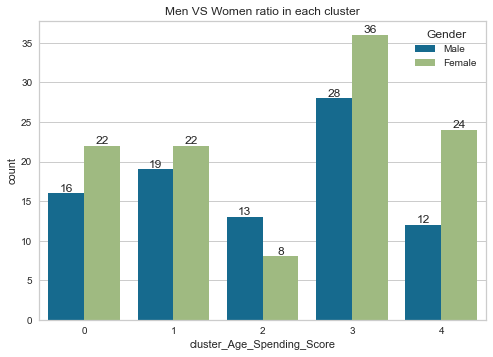

In [126]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [127]:
df.groupby("cluster_Age_Spending_Score").mean()


,CustomerID,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score),Pred(A_I-S_S-Hierarchical)
cluster_Age_Spending_Score,,,,,,,
0,85.63,24.13,53.79,41.84,0.00,0.39,1.50
1,119.83,45.44,69.39,15.54,1.00,1.34,2.68
2,77.43,64.95,51.52,48.14,2.00,0.19,1.29
3,109.55,30.14,63.75,80.16,3.00,3.47,1.02
4,91.56,47.14,57.25,46.44,4.00,0.19,1.19


<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

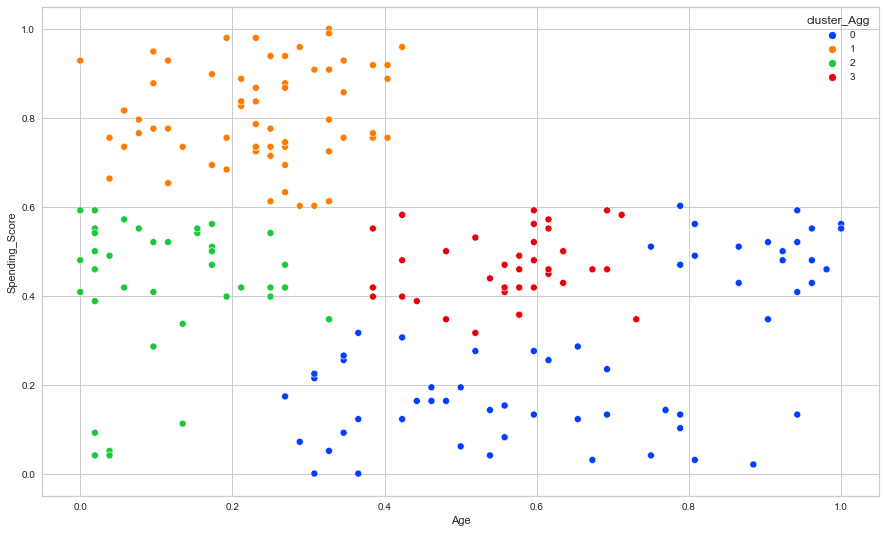

In [135]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X_2, palette="bright")


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [139]:
X_2

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,0.02,0.39,0,2
1,0.06,0.82,3,1
2,0.04,0.05,0,2
3,0.10,0.78,3,1
4,0.25,0.40,0,2
...,...,...,...,...
195,0.33,0.80,3,1
196,0.52,0.28,1,0
197,0.27,0.74,3,1
198,0.27,0.17,1,0


In [140]:
X_2.cluster_Agg.value_counts()


1    64
0    62
2    38
3    36
Name: cluster_Agg, dtype: int64

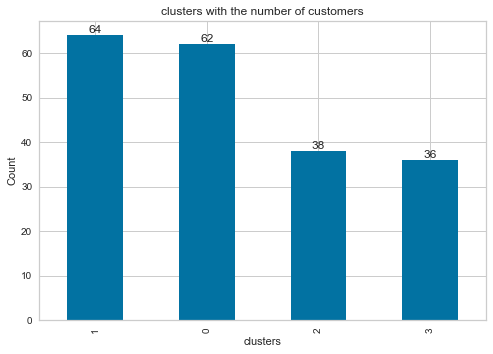

In [142]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X_2.cluster_Agg.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [143]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Predicted(Age-Spending_Score),Predicted(Annual_Income-Spending_Score),Pred(A_I-S_S-Hierarchical),cluster_Age_Spending_Score
0,1,Male,19,15,39,0,2,4,0
1,2,Male,21,15,81,3,3,3,3
2,3,Female,20,16,6,0,2,4,0
3,4,Female,23,16,77,3,3,3,3
4,5,Female,31,17,40,0,2,4,0


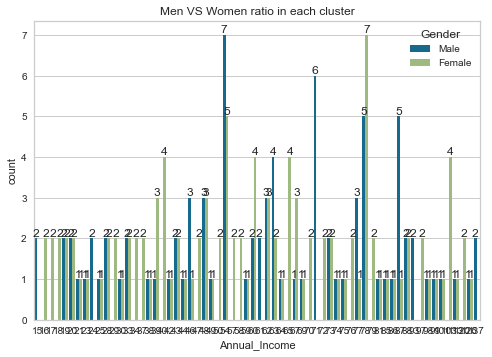

In [144]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.Annual_Income, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [145]:
df.groupby(["Gender", "Annual_Income"]).mean()


CustomerID   Age  Spending_Score  \
Gender Annual_Income                                     
Female 16                   3.50 21.50           41.50   
       17                   5.50 26.50           58.00   
       18                   7.50 29.00           50.00   
       19                  11.00 32.50           85.50   
       20                  13.50 41.00           46.00   
...                          ...   ...             ...   
Male   99                 186.00 30.00           97.00   
       101                188.00 28.00           68.00   
       113                193.00 33.00            8.00   
       126                198.00 32.00           74.00   
       137                199.50 31.00           50.50   

                      Predicted(Age-Spending_Score)  \
Gender Annual_Income                                  
Female 16                                      1.50   
       17                                      1.50   
       18                                      2.00   
       19                                      3.00   
       20                                      2.00   
...                                             ...   
Male   99                                      3.00   
       101                                     3.00   
       113                                     1.00   
       126                                     3.00   
       137                                     2.00   

                      Predicted(Annual_Income-Spending_Score)  \
Gender Annual_Income                                            
Female 16                                                2.50   
       17                                                2.50   
       18                                                2.50   
       19                                                3.00   
       20                                                2.50   
...                                                       ...   
Male   99                                                4.00   
       101                                               4.00   
       113                                               1.00   
       126                                               4.00   
       137                                               2.50   

                      Pred(A_I-S_S-Hierarchical)  cluster_Age_Spending_Score  
Gender Annual_Income                                                          
Female 16                                   3.50                        1.50  
       17                                   3.50                        1.50  
       18                                   3.50                        2.00  
       19                                   3.00                        3.00  
       20                                   3.50                        2.00  
...                                          ...                         ...  
Male   99                                   0.00                        3.00  
       101                                  0.00                        3.00  
       113                                  2.00                        1.00  
       126                                  0.00                        3.00  
       137                                  1.00                        2.00  

[103 rows x 7 columns]

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___